In [10]:
%load_ext autoreload
%autoreload 2

import os
import json
import pickle
import jsonlines
import pandas as pd
from collections import defaultdict
import shutil
from tqdm import tqdm

def load_pickle_file(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data

# 输入json文件路径
JSON_FILE_PATH = 'dataset/rank/nq-rank-10.json'

# 输出文件夹
OUTPUT_DIR = 'output/rank/gen/Qwen/Qwen2.5-7B-Instruct/nq-rank-10'


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
qid_greedy_count = defaultdict(int)
qid_doc_count = defaultdict(int)
doc_sample_count = defaultdict(int)

for file_name in tqdm(os.listdir(OUTPUT_DIR)):
    if file_name.endswith(".pkl"):
        file_path = os.path.join(OUTPUT_DIR, file_name)
        data = load_pickle_file(file_path)
        ds, qid, did = file_name.split('.')[0].split('-')
        if data['greedy'] is not None:
            qid_greedy_count[qid] += 1
        if len(data['sample']) > 0:
            qid_doc_count[qid] += 1
        doc_sample_count[len(data['sample'])] += 1

  0%|          | 0/4034 [00:00<?, ?it/s]

100%|██████████| 4034/4034 [00:05<00:00, 796.93it/s] 


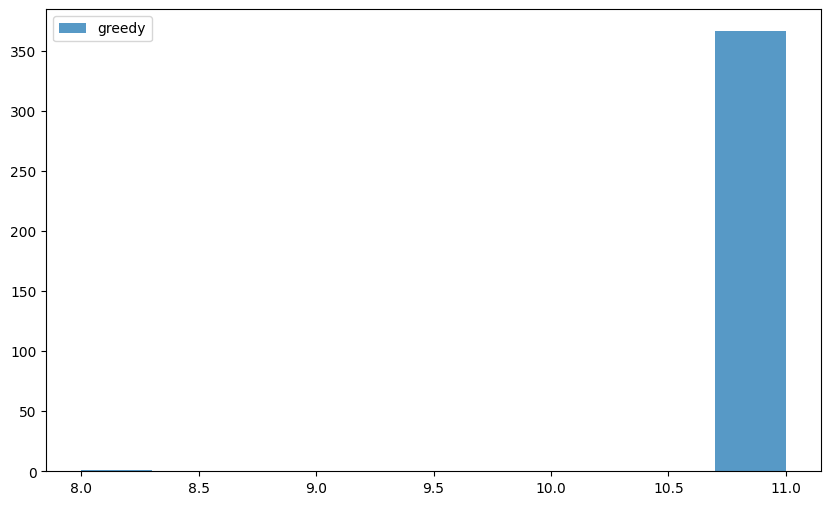

In [18]:
# 可视化qid_greedy_count的分布
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.hist(list(qid_greedy_count.values()), alpha=0.75, label='greedy')
plt.legend()
plt.show()

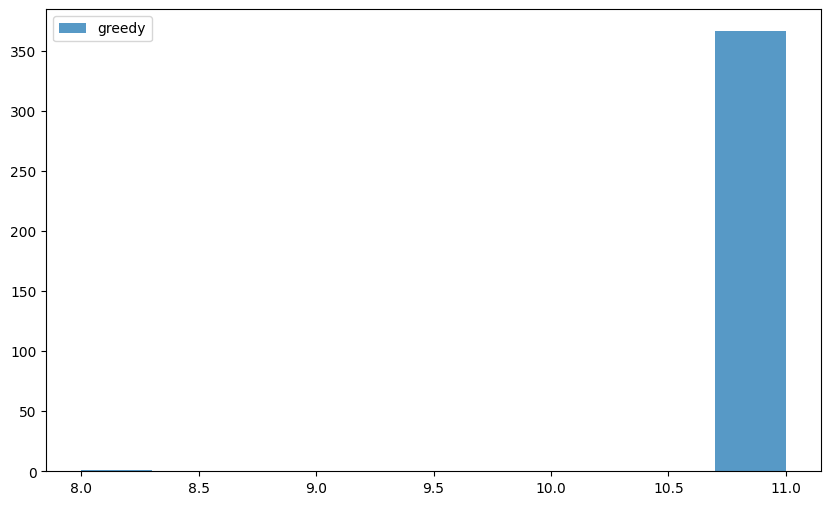

In [19]:
# 可视化qid_doc_count的分布
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.hist(list(qid_doc_count.values()), alpha=0.75, label='greedy')
plt.legend()
plt.show()

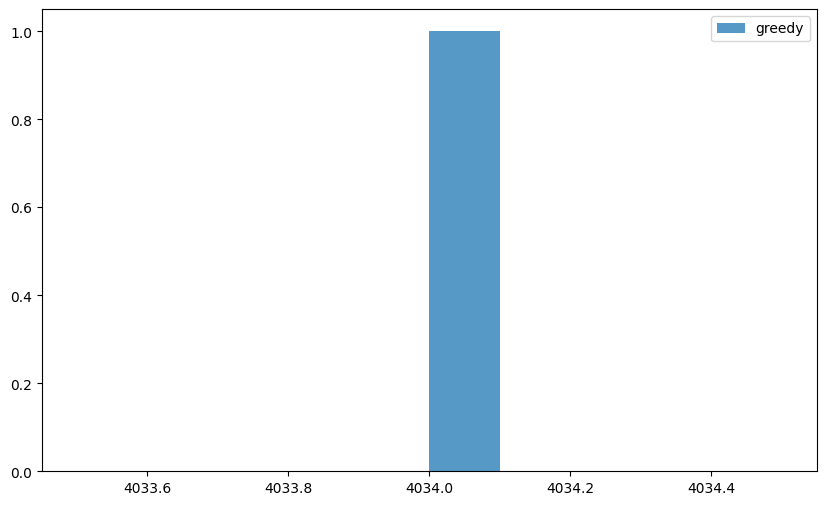

In [20]:
# 可视化doc_sample_count的分布
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.hist(list(doc_sample_count.values()), alpha=0.75, label='greedy')
plt.legend()
plt.show()

In [21]:
doc_sample_count

defaultdict(int, {10: 4034})

In [ ]:
for file_name in tqdm(os.listdir(OUTPUT_DIR)):
    if file_name.endswith(".pkl"):
        file_path = os.path.join(OUTPUT_DIR, file_name)
        data = load_pickle_file(file_path)
        print(data)
        break